In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = r"C:\Users\Trisha\OneDrive\Desktop\YTtrend\data\youtube_trending_cleaned.csv"
df = pd.read_csv(file_path)


In [6]:
# Linear Regression for Trend Prediction
# Select relevant features for regression
X = df[['Likes', 'Comments', 'Views']]
y = df['Views']  # Predicting views as the target


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict and evaluate
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Linear Regression Evaluation:
Mean Squared Error: 5.832753578087838e-18
R-squared Score: 1.0


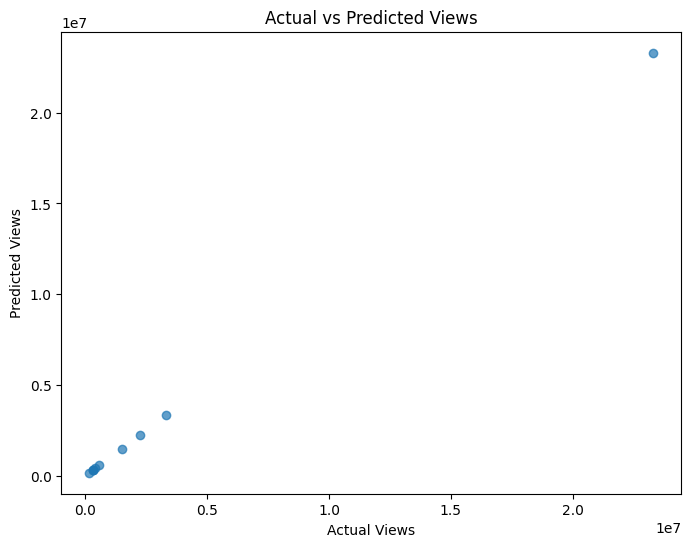

In [11]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs Predicted Views")
plt.show()

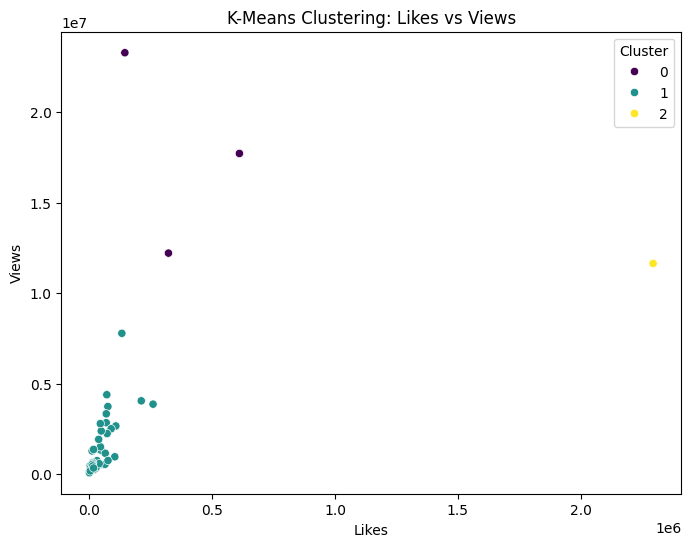


Cluster Centers (Scaled Features):
[[ 0.75941898  0.57571422  3.38193288]
 [-0.19431851 -0.1763925  -0.2644995 ]
 [ 6.66039452  6.38691252  2.02117842]]


In [14]:
# K-Means Clustering for Insights
# Select features for clustering
cluster_features = df[['Likes', 'Comments', 'Views']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Plot clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Likes'], y=df['Views'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('K-Means Clustering: Likes vs Views')
plt.legend(title="Cluster")
plt.show()

# Display cluster centers
print("\nCluster Centers (Scaled Features):")
print(kmeans.cluster_centers_)

In [16]:
# Save the clustered dataset
df.to_csv(file_path, index=False)
print("\nClustered dataset saved as 'youtube_trending_clustered.csv'")


Clustered dataset saved as 'youtube_trending_clustered.csv'


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 1.1263182386755944e-09
MSE: 5.832753578087838e-18
R² Score: 1.0


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Test MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test R² Score: {r2_test}")


Test MAE: 1.1263182386755944e-09
Test MSE: 5.832753578087838e-18
Test R² Score: 1.0


In [19]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.8099988661849197


In [22]:
y_test_clusters = kmeans.predict(X_test)


c:\Users\Trisha\OneDrive\Desktop\YTtrend\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [24]:
from sklearn.metrics import silhouette_score

if len(set(y_test_clusters)) > 1:  # Ensure more than one cluster
    silhouette_test = silhouette_score(X_test_scaled, y_test_clusters)
    print(f"Silhouette Score (Test Data): {silhouette_test}")
else:
    print("Only one cluster found in test data. Cannot compute Silhouette Score.")


Only one cluster found in test data. Cannot compute Silhouette Score.


In [25]:
import joblib

# Save the Linear Regression model
joblib.dump(reg_model, 'linear_regression_model.pkl')

# Save the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']